<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href="#AcquireExercises">Acquire Exercises</a></li>
<li><a href="#Acquirepy">Acquire.py Testing</a></li>
<li><a href="#PrepareExercises">Prepare Exercises</a></li>
<li><a href="#TidyExercises">Tidy Exercises</a></li>
<li><a href="#ExploratoryExercisesPartI">Exploratory Exercises - Part I</a></li>
<li><a href="#ExploratoryExercisesPartII">Exploratory Exercises - Part II</a></li>
<li><a href="#ExploratoryExercisesPartIII">Exploratory Exercises - Part III</a></li>

### Acquisition:
 - Objectives:
     - Find out where our data is
     - Figure out the appropriate method to obtain our data
     - Actually obtain the data
     - Construct a replicable means of acquiring that data on a modular level*

In [1]:
# Copy portion you want then run this command
# pd.read_clipboard()

## Notes:
 - read_clipboard is fairly fragile.
 - It will do its best, but can often break or corrupt your information that you want
 - It may be best practice to reformat the data that you put in your clipboard by savign it in a csv or other text file before readint it into a pandas dataframe
 - If we want to take raw text data off of a web page, this will require often a little bit of extra manipulation regarding strings, content, html, regex, and other topics that we will dive further on into inside of our other methodologies

<a id="AcquireExercises"></a>
# Acquire Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

##### 1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.
COMPLETED

##### 2. Inside of your local classification-exercises repo, create a file named .gitignore with the following contents: env.py .DS_Store .ipynb_checkpoints/ __pycache__ *.csv Add and commit your .gitignore file before moving forward.
COMPLETED

##### 3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.
COMPLETED

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pydataset import data
import env
import acquire
import prepare
import explore
import itertools

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
df_iris = data('iris')

##### 4a. Print the first 3 rows

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


##### 4b. Print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

##### 4c. Print the column names

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

##### 4d. Print the data type of each column

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


##### 4e. Print the summary statistics for each of the numeric variables

In [8]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Read the data from this google sheet into a dataframe, df_google.

In [9]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

##### 5a. print the first 3 rows

In [10]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


##### 5b. print the number of rows and columns

In [11]:
df_google.shape

(891, 12)

##### 5c. print the column names

In [12]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### 5d. print the data type of each column

In [13]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 5e. print the summary statistics for each of the numeric variables

In [14]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 5f. print the unique values for each of your categorical variables

In [15]:
df_google.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [16]:
df_excel = pd.read_excel('train.xlsx')

##### 6a. assign the first 100 rows to a new dataframe, df_excel_sample

In [17]:
df_excel_sample = df_excel.head(100)

##### 6b. print the number of rows of your original dataframe

In [18]:
df_excel.shape[0]

891

##### 6c. print the first 5 column names

In [19]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

##### 6d. print the column names that have a data type of object

In [20]:
df_excel.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

##### 6e. compute the range for each of the numeric variables.

In [21]:
numeric_col = df_excel.select_dtypes(include=['float', 'int']).columns
for col in numeric_col:
    col_min = df_excel[col].min()
    col_max = df_excel[col].max()
    col_range = col_max - col_min
    print(f'Range for {col}: {col_range}')

Range for PassengerId: 890
Range for Survived: 1
Range for Pclass: 2
Range for Age: 79.58
Range for SibSp: 8
Range for Parch: 6
Range for Fare: 512.3292


<a id="Acquirepy"></a>
# Acquire.py Testing
<li><a href="#TableOfContents">Table of Contents</li></a>

In [22]:
# Acquire titanic dataset and alias as titanic_df
titanic_df = acquire.get_titanic_data()


In [23]:
# Acquire iris dataset and alias as iris_df
iris_df = acquire.get_iris_data()
iris_df.sample()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
104,3,105,6.5,3.0,5.8,2.2,virginica


In [24]:
# Acquire telco_churn dataset and alias as telco_df
telco_df = acquire.get_telco_data()
telco_df.sample()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
4726,1,2,3,6654-QGBZZ,Female,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,19.9,19.9,No,None,Mailed check,Month-to-month


<a id="PrepareExercises"></a>
# Prepare Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

##### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

##### This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

### 1. Using the Iris Data:

##### 1a. Use the function defined in acquire.py to load the iris data.

In [25]:
iris_db = acquire.get_iris_data()
iris_db.sample()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
103,3,104,6.3,2.9,5.6,1.8,virginica


##### 1b. Drop the species_id and measurement_id columns.

In [26]:
iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
iris_db.sample()

,sepal_length,sepal_width,petal_length,petal_width,species_name
39,5.1,3.4,1.5,0.2,setosa


##### 1c. Rename the species_name column to just species.

In [27]:
iris_db = iris_db.rename(columns={'species_name' : 'species'})
iris_db.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa


##### 1d. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [28]:
# 'setosa', 'versicolor', 'virginica'
iris_db.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [29]:
dummies = pd.get_dummies(iris_db['species'])
iris_db = pd.concat([iris_db, dummies], axis=1)

In [30]:
iris_db.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
setosa          0
versicolor      0
virginica       0
dtype: int64

In [31]:
iris_db

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


##### 1e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [32]:
def prep_iris():
    iris_db = acquire.get_iris_data()
    iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
    iris_db = iris_db.rename(columns={'species_name' : 'species'})
    dummies = pd.get_dummies(iris_db['species'])
    iris_db = pd.concat([iris_db, dummies], axis=1)
    return iris_db

In [33]:
prep_iris().sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
88,5.6,3.0,4.1,1.3,versicolor,0,1,0


In [34]:
iris_db = prepare.prep_iris()

### 2. Using the Titanic Data:

##### 2a. Use the function defined in acquire.py to load the Titanic data.

In [35]:
titanic_db = acquire.get_titanic_data()
titanic_db.sample()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
643,643,1,3,male,NaN,0,0,56.4958,S,Third,NaN,Southampton,1


##### 2b. Drop any unnecessary, unhelpful, or duplicated columns.

In [36]:
# passenger_id, sibsp, parch, embarked, class
titanic_db = titanic_db.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'class'])
titanic_db.sample()

,survived,pclass,sex,age,fare,deck,embark_town,alone
394,1,3,female,24.0,16.7,G,Southampton,0


##### 2c. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [37]:
# sex, deck, embark_town
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [38]:
dummies = pd.get_dummies(titanic_db[['sex', 'deck', 'embark_town']])
titanic_db = pd.concat([titanic_db, dummies], axis=1)
titanic_db.sample()

,survived,pclass,sex,age,fare,deck,embark_town,alone,sex_female,sex_male,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
637,0,2,male,31.0,26.25,NaN,Southampton,0,0,1,0,0,0,0,0,0,0,0,0,1


In [39]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        177
fare                         0
deck                       688
embark_town                  2
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [40]:
titanic_db.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [41]:
titanic_db.embark_town = titanic_db.embark_town.fillna('Southampton')

In [42]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        177
fare                         0
deck                       688
embark_town                  0
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [43]:
titanic_db.age = titanic_db.age.fillna(titanic_db.age.mean())

In [44]:
titanic_db.age.value_counts(dropna=False)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       3
7.000000       3
65.000000      3
61.000000      3
46.000000      3
10.000000      2
64.000000     

In [45]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                          0
fare                         0
deck                       688
embark_town                  0
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

##### 2d. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [46]:
def prep_titanic():
    titanic_db = acquire.get_titanic_data()
    titanic_db = titanic_db.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'class', 'deck'])
    titanic_db.embark_town = titanic_db.embark_town.fillna('Southampton')
    titanic_db.age = titanic_db.age.fillna(titanic_db.age.mean())
    dummies = pd.get_dummies(titanic_db[['sex', 'embark_town']])
    titanic_db = pd.concat([titanic_db, dummies], axis=1)
    return titanic_db

In [47]:
prep_titanic().sample()

,survived,pclass,sex,age,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
184,1,3,female,4.0,22.025,Southampton,0,1,0,0,0,1


### 3. Using the Telco Data:

##### 3a. Use the function defined in acquire.py to load the Telco data.

In [48]:
telco_db = acquire.get_telco_data()
telco_db.sample()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
3777,2,3,3,5313-FPXWG,Male,0,No,No,51,Yes,...,No internet service,No internet service,No internet service,Yes,24.6,1266.4,No,None,Bank transfer (automatic),One year


##### 3b. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [49]:
# contract_type_id, payment_type_id, 
# internet_service_type_id, customer_id
telco_db = telco_db.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
2427,3472-QPRCH,Male,0,Yes,Yes,40,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.25,1006.9,No,None,Credit card (automatic),Two year


##### 3c. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [50]:
telco_db.select_dtypes(include='object').sample()

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,internet_service_type,payment_type,contract_type
4988,7014-ZZXAW,Female,Yes,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,1732.95,No,None,Credit card (automatic),Two year


In [51]:
# gender, partner, dependents, phone_service, 
# multiple_lines, online_security, online_backup, 
# device_protection, tech_support, streaming_tv,
# streaming_movies, paperless_billing,
# churn, internet_service_type, payment_type
# contract_type
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
5494,7733-UDMTP,Female,1,No,No,57,No,No phone service,No,Yes,...,No,Yes,Yes,Yes,55.0,3094.05,No,DSL,Electronic check,Month-to-month


In [52]:
dummies = pd.get_dummies(telco_db.select_dtypes(include='object'))
telco_db = pd.concat([telco_db, dummies], axis=1)
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
1885,2737-WFVYW,Female,0,No,No,2,No,No phone service,No,No,...,1,0,0,0,0,1,0,1,0,0


##### 3d. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [53]:
def prep_telco():
    telco_db = acquire.get_telco_data()
    telco_db = telco_db.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])
    dummies = pd.get_dummies(telco_db.select_dtypes(include='object'))
    telco_db = pd.concat([telco_db, dummies], axis=1)
    return telco_db

In [54]:
prep_telco().sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
3320,4727-MCYZG,Male,0,No,No,1,Yes,No,No,No,...,1,0,0,0,0,0,1,1,0,0


### 4. Split Your Data:

In [55]:
# split our df into train_val and test:
# split our train_val to train and validate:
# Theres no real number that needs to represent the train test
# proportion the best base value is going to be an 80/20
# split in cases where you have an excess of data
# you can get away with allocating more for your test
# and vice versa if you are limited on data
train_val, test = train_test_split(titanic_db, train_size=0.8, random_state=1349, stratify=titanic_db['survived'])

In [56]:
train_val.shape , test.shape

((712, 20), (179, 20))

In [57]:
train, validate = train_test_split(train_val, train_size=0.7, random_state=1349, stratify=train_val['survived'])

In [58]:
train.shape, validate.shape, test.shape

((498, 20), (214, 20), (179, 20))

In [59]:
train.shape[0] + validate.shape[0] + test.shape[0]

891

##### 4a. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [60]:
# stratify input: survived
prepare.split(titanic_db)

What column do you want to stratify onsurvived
train.shape:(498, 20)
validate.shape:(214, 20)
test.shape:(179, 20)


(     survived  pclass     sex        age     fare deck  embark_town  alone  \
 474         0       3  female  22.000000   9.8375  NaN  Southampton      1   
 370         1       1    male  25.000000  55.4417    E    Cherbourg      0   
 573         1       3  female  29.699118   7.7500  NaN   Queenstown      1   
 110         0       1    male  47.000000  52.0000    C  Southampton      1   
 167         0       3  female  45.000000  27.9000  NaN  Southampton      0   
 ..        ...     ...     ...        ...      ...  ...          ...    ...   
 735         0       3    male  28.500000  16.1000  NaN  Southampton      1   
 163         0       3    male  17.000000   8.6625  NaN  Southampton      1   
 770         0       3    male  24.000000   9.5000  NaN  Southampton      1   
 196         0       3    male  29.699118   7.7500  NaN   Queenstown      1   
 94          0       3    male  59.000000   7.2500  NaN  Southampton      1   
 
      sex_female  sex_male  deck_A  deck_B  deck_C

##### 4b. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [61]:
# strat input: species
iris_db = prepare.prep_iris()
iris_train, iris_validate, iris_test = prepare.split(iris_db)

What column do you want to stratify onspecies
train.shape:(84, 8)
validate.shape:(36, 8)
test.shape:(30, 8)


In [62]:
train.shape, validate.shape, test.shape

((498, 20), (214, 20), (179, 20))

##### 4c. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [63]:
# strat input: survived
titanic_db = prepare.prep_titanic()
titanic_train, titanic_validate, titanic_test = prepare.split(titanic_db)

What column do you want to stratify onsurvived
train.shape:(498, 12)
validate.shape:(214, 12)
test.shape:(179, 12)


In [64]:
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 12), (214, 12), (179, 12))

##### 4d. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [65]:
telco_db = prepare.prep_telco()

In [66]:
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
2165,3096-YXENJ,Female,0,Yes,No,65,Yes,Yes,No,Yes,...,0,1,0,1,0,0,0,0,0,1


In [67]:
# strat input: churn
telco_db = prepare.prep_telco()
telco_train, telco_validate, telco_test = prepare.split(telco_db)

What column do you want to stratify onchurn
train.shape:(3943, 64)
validate.shape:(1691, 64)
test.shape:(1409, 64)


In [68]:
telco_train.shape, telco_validate.shape, telco_test.shape

((3943, 64), (1691, 64), (1409, 64))

<a id="TidyExercises"></a>
# Tidy Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

| name | value |
| :---: | :---: |
| Billy | 0.5250 |
| Jane | 0.6875 |
| John | 0.9125 |
| Sally | 0.7625 |

Name: grade, dtype: float64

### 2. Coffee Levels

##### 2a. Read the coffee_levels table.

##### 2b. Transform the data so that each carafe is in it's own column.

##### 2c. Is this the best shape for the data?

### 3. Cake Recipes

##### 3a. Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

##### 3b. Tidy the data as necessary.

##### 3c. Which recipe, on average, is the best? recipe b

##### 3d. Which oven temperature, on average, produces the best results? 275

##### 3e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

### 4. Bonus:

##### 4a. explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.

<a id="ExploratoryExercisesPartI"></a>
# Exploratory Exercises - Part I
<li><a href="#TableOfContents">Table of Contents</li></a>

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data

In [69]:
# Get prepped iris dataframe
iris = prepare.prep_iris()

In [70]:
# Split the iris dataframe
iris_training, iris_validate, iris_test = prepare.split(iris)

What column do you want to stratify onspecies
train.shape:(84, 8)
validate.shape:(36, 8)
test.shape:(30, 8)


In [71]:
# Verify each dataframe shape
iris_training.shape, iris_validate.shape, iris_test.shape

((84, 8), (36, 8), (30, 8))

In [72]:
# Get a sample of training
iris_training.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
13,4.3,3.0,1.1,0.1,setosa,1,0,0


In [73]:
# Get a sample of validate
iris_validate.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
128,6.4,2.8,5.6,2.1,virginica,0,0,1


In [74]:
# Get a sample of test
iris_test.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
131,7.9,3.8,6.4,2.0,virginica,0,0,1


### 2. Univariate Stats

##### 2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

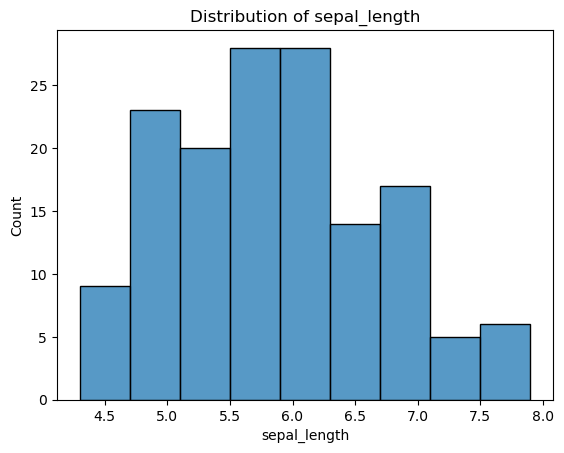

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


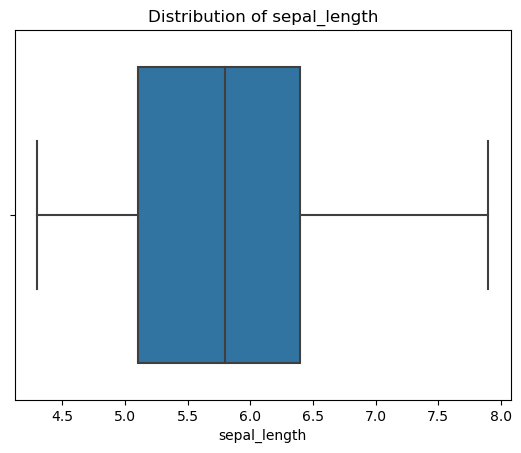

|       |   sepal_length |
|:------|---------------:|
| count |     150        |
| mean  |       5.84333  |
| std   |       0.828066 |
| min   |       4.3      |
| 25%   |       5.1      |
| 50%   |       5.8      |
| 75%   |       6.4      |
| max   |       7.9      |




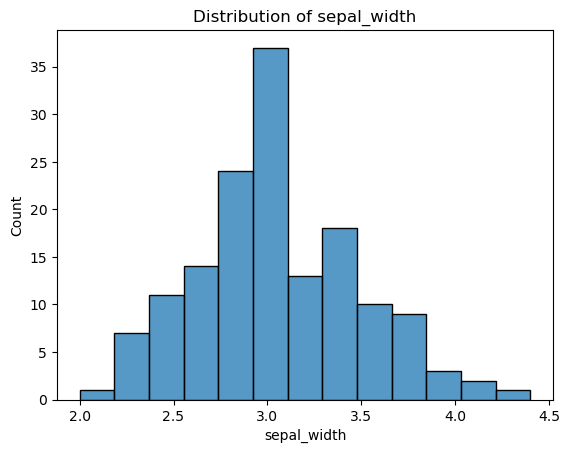

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


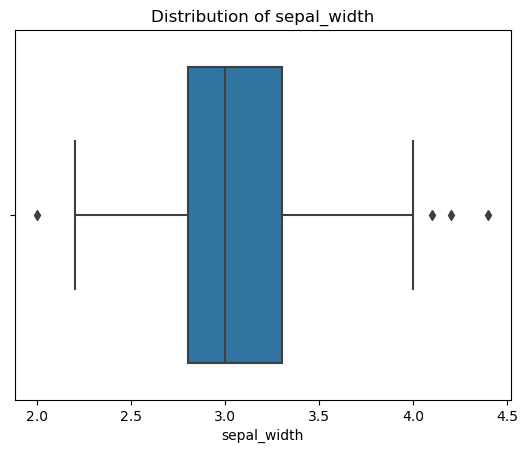

|       |   sepal_width |
|:------|--------------:|
| count |    150        |
| mean  |      3.05733  |
| std   |      0.435866 |
| min   |      2        |
| 25%   |      2.8      |
| 50%   |      3        |
| 75%   |      3.3      |
| max   |      4.4      |




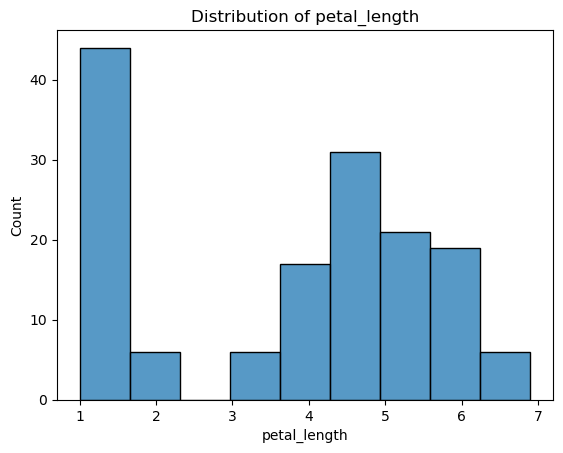

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


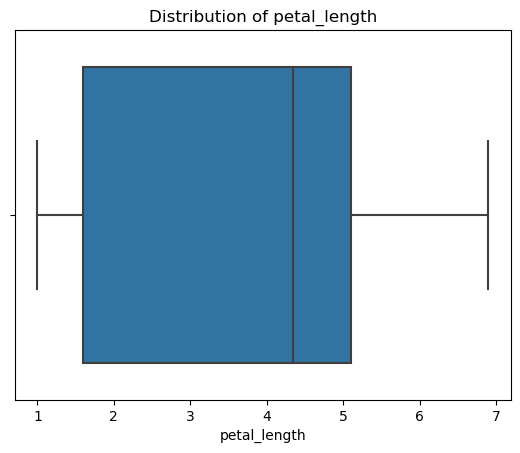

|       |   petal_length |
|:------|---------------:|
| count |       150      |
| mean  |         3.758  |
| std   |         1.7653 |
| min   |         1      |
| 25%   |         1.6    |
| 50%   |         4.35   |
| 75%   |         5.1    |
| max   |         6.9    |




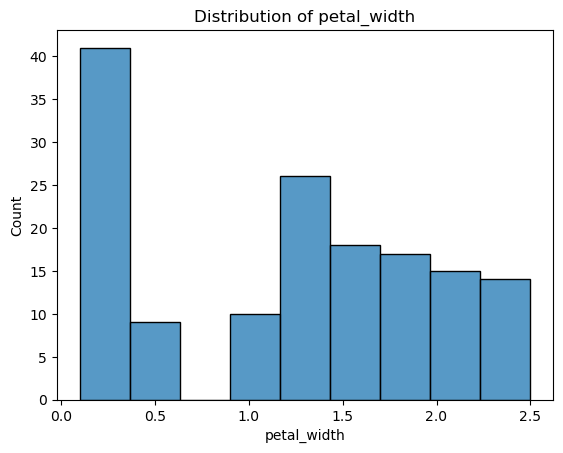

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


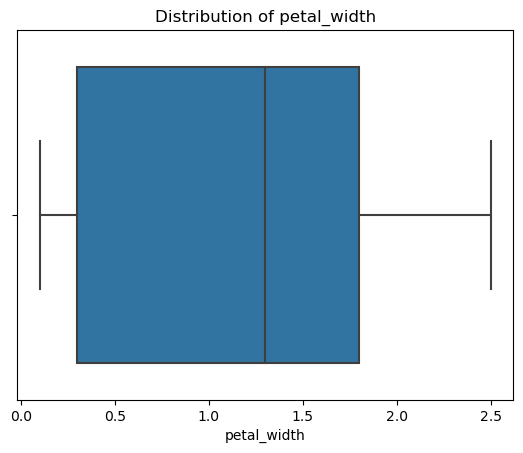

|       |   petal_width |
|:------|--------------:|
| count |    150        |
| mean  |      1.19933  |
| std   |      0.762238 |
| min   |      0.1      |
| 25%   |      0.3      |
| 50%   |      1.3      |
| 75%   |      1.8      |
| max   |      2.5      |




In [75]:
explore.quantitative(iris)

##### 2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

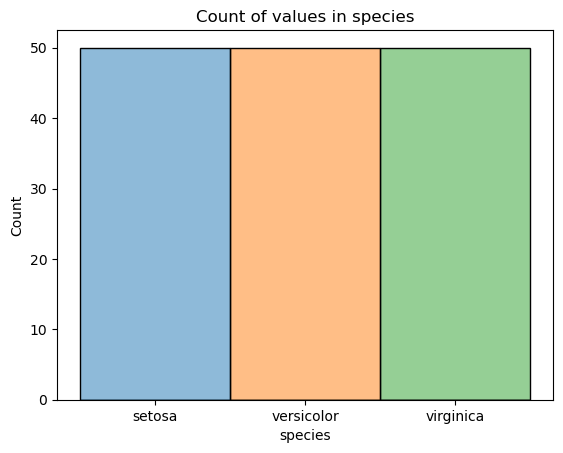

            Count  Percentage
setosa         50    0.333333
versicolor     50    0.333333
virginica      50    0.333333




In [76]:
explore.categorical(iris)

##### 2c. Document takeaways & any actions.

- Quantitative
    - sepal_length is normal
    - sepal_width is normal
    - petal_length has a break (Clustered?)
    - petal_width has a break (Clustered?)
- Categorical
    - species evenly distributed

### 3. Bivariate Stats

##### 3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

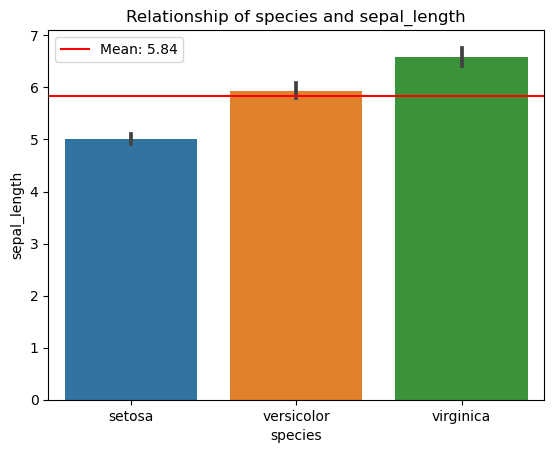

|       |   setosa |   versicolor |   virginica |
|:------|---------:|-------------:|------------:|
| count | 50       |    50        |    50       |
| mean  |  5.006   |     5.936    |     6.588   |
| std   |  0.35249 |     0.516171 |     0.63588 |
| min   |  4.3     |     4.9      |     4.9     |
| 25%   |  4.8     |     5.6      |     6.225   |
| 50%   |  5       |     5.9      |     6.5     |
| 75%   |  5.2     |     6.3      |     6.9     |
| max   |  5.8     |     7        |     7.9     |




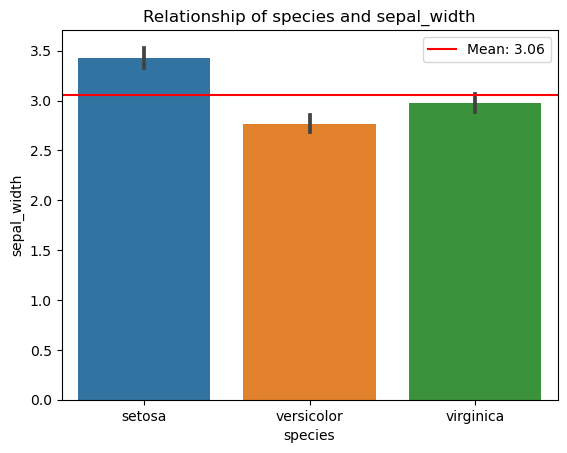

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  3.428    |     2.77     |    2.974    |
| std   |  0.379064 |     0.313798 |    0.322497 |
| min   |  2.3      |     2        |    2.2      |
| 25%   |  3.2      |     2.525    |    2.8      |
| 50%   |  3.4      |     2.8      |    3        |
| 75%   |  3.675    |     3        |    3.175    |
| max   |  4.4      |     3.4      |    3.8      |




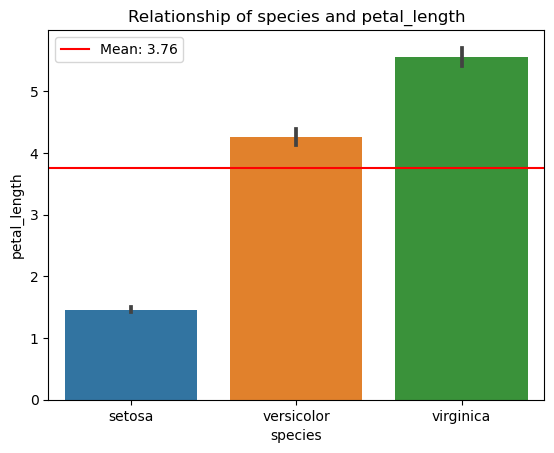

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  1.462    |     4.26     |    5.552    |
| std   |  0.173664 |     0.469911 |    0.551895 |
| min   |  1        |     3        |    4.5      |
| 25%   |  1.4      |     4        |    5.1      |
| 50%   |  1.5      |     4.35     |    5.55     |
| 75%   |  1.575    |     4.6      |    5.875    |
| max   |  1.9      |     5.1      |    6.9      |




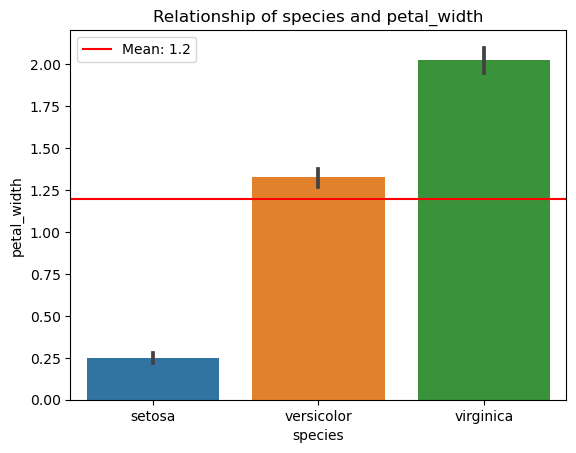

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |    50       |
| mean  |  0.246    |     1.326    |     2.026   |
| std   |  0.105386 |     0.197753 |     0.27465 |
| min   |  0.1      |     1        |     1.4     |
| 25%   |  0.2      |     1.2      |     1.8     |
| 50%   |  0.2      |     1.3      |     2       |
| 75%   |  0.3      |     1.5      |     2.3     |
| max   |  0.6      |     1.8      |     2.5     |




In [77]:
explore.cat_vs_val(iris)

##### 3b. For each measurement type, compute the descriptive statistics for each species.

In [78]:
iris.groupby('species')['petal_width'].describe().T

species,setosa,versicolor,virginica
count,50.000000,50.000000,50.00000
mean,0.246000,1.326000,2.02600
std,0.105386,0.197753,0.27465
min,0.100000,1.000000,1.40000
25%,0.200000,1.200000,1.80000
50%,0.200000,1.300000,2.00000
75%,0.300000,1.500000,2.30000
max,0.600000,1.800000,2.50000


##### 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [79]:
# species, petal_width
explore.mannwhitneyu(iris)

What column do you want unique combinations of?
species
What value do you want to compare with?
petal_width
setosa and versicolor relationship:
Stat: 0.0
P-value: 2.2846694544023607e-18

setosa and virginica relationship:
Stat: 0.0
P-value: 2.4321931370649925e-18

versicolor and virginica relationship:
Stat: 49.0
P-value: 9.698045444914185e-17



##### 3d. Document takeaways & any actions.

### 4. Multivariate Stats

##### 4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

##### 4b. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

##### 4c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

##### 4d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

##### 4e. Document takeaways and any actions.

<a id="ExploratoryExercisesPartII"></a>
# Exploratory Exercises - Part II
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Explore your titanic dataset more completely.

##### 1a. Determine drivers of the target variable

##### 1b. Determine if certain columns should be dropped

##### 1c. Determine if it would be valuable to bin some numeric columns

##### 1d. Determine if it would be valuable to combine multiple columns into one.

### 2. Does it make sense to combine any features?

### 3. Do you find any surprises?

### 4. Document any and all findings and takeaways in your notebook using markdown.

<a id="ExploratoryExercisesPartIII"></a>
# Exploratory Exercises - Part III
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Explore telco

##### 1a. Explore your telco data to discover drivers of churn

##### 1b. Determine if certain columns should be dropped

##### 1c. Determine if it would be valuable to bin some numeric columns

##### 1d. Determine if it would be valuable to combine multiple columns into one.

### 2. What are your drivers of churn?

### 3. Does it make sense to combine any features?

### 4. Do you find any surprises?

### 5. Document any and all findings and takeaways in your notebook using markdown.